In [1]:
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit.providers.aer import QasmSimulator
from qiskit.visualization import plot_histogram

In [2]:
simulator = QasmSimulator()

In [3]:
circuit = QuantumCircuit(3,2)

In [4]:
circuit.x(2)
circuit.h(0)
circuit.h(1)
circuit.h(2)
circuit.z(0)
circuit.z(1)

In [5]:
circuit.h(0)
circuit.h(1)

In [6]:
circuit.measure([0,1], [0,1])

In [7]:
circuit.draw()

┌───┐┌───┐┌───┐┌─┐   
q_0: ┤ H ├┤ Z ├┤ H ├┤M├───
     ├───┤├───┤├───┤└╥┘┌─┐
q_1: ┤ H ├┤ Z ├┤ H ├─╫─┤M├
     ├───┤├───┤└───┘ ║ └╥┘
q_2: ┤ X ├┤ H ├──────╫──╫─
     └───┘└───┘      ║  ║ 
c: 2/════════════════╩══╩═
                     0  1

In [8]:
compiled_circuit = transpile(circuit, simulator)

In [9]:
job = simulator.run(compiled_circuit, shots=1000)

In [10]:
result = job.result()

In [11]:
counts = result.get_counts(compiled_circuit)
print("\nTotal counts are:",counts)


Total counts are: {'11': 1000}


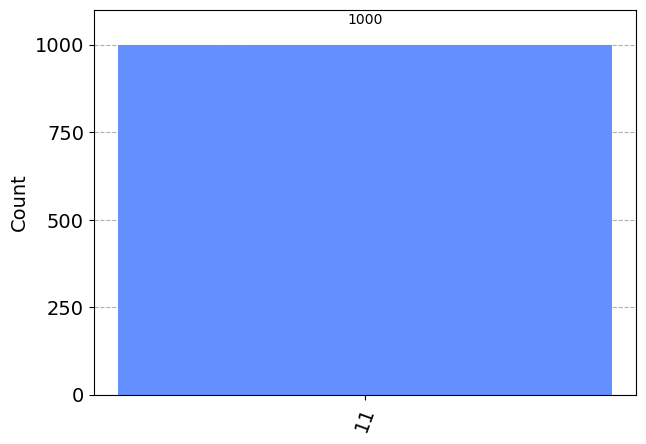

In [12]:
plot_histogram(counts)